# Introduction

This assessment provided data for 100 blue chip stocks over four days. The dataset consisted of approximately 13.2 million rows, each row contained information about one stock and contained changes in the data caused by some form of an update, such as a change in trade price of a change in the number of bidders etc.

Nine questions were to be answered for each stock individually:
* Mean time between trades
* Median time between trades
* Longest time between trades
* Mean time between tick changes
* Median time between tick changes
* Longest time between tick changes
* Mean bid ask spread
* Median bid ask spread
* Presence of the round number effect

### Loading and Manipulating the Data

The data was contained within a csv file. Each row may have a different number of columns and this initially caused errors when reading in the data using the pd.read_csv function. As the number of maximum columns at this time was not known this meant that it could not be specified and so the function automatically only created the number of columns seen in the first row. 

This code was constructed to hurdle this issue as it forced the pd.read_csv function to load each row using the maximum number of columns for any row in the dataset by manually mapping them beforehand.

The column names were then renamed to make them easier to work with for later on and only specific values were kept in the Condition Code 1 column, as specified in the assessment description.

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
with open("scandi.csv", 'r') as temp_f:
    
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]


column_names = [i for i in range(0, max(col_count))]

df = pd.read_csv("scandi.csv", header=None, delimiter=",", names=column_names)

df = df.rename(columns = {0:'Code', 1:'1', 2:'Bid Price', 3:'Ask Price', 4:'Trade Price', 5:'Bid Volume', \
                         6:'Ask Volume', 7:'Trade Volume', 8:'Update Type', 9:'9', 10:'Date', 11:'Seconds',\
                         12:'Opening Price', 13:'13', 14:'Condition Code 1', 15:'Condition Code 2'})

df = df[(df['Condition Code 1'].isna()) | (df['Condition Code 1'] == 'XT')]

### Time Between Trades

The first three questions to be answered centred around time between trades. The Seconds column was key to solving these problems but the column was reset at the start of every day as it is a measure of seconds after midnight. If the difference was calculated between the last trade of one day and the first trade of the next without taking the new day into account, the difference would be negative and cause the mean and median calculations to later be incorrect.

To combat this, the difference in time between trades was calculated for specific days and would be returned in a list using the time_differences function. The time_between_trades function combines all dates without containing negative differences and then calculates the mean, median and longest times between trades for the specified stock.

In [7]:
def time_differences(stock, date):
    
    data = df[(df['Code'] == stock) & (df['Update Type'] == 1) & (df['Date'] == date)]
    data = data.reset_index()
    data = data['Seconds']
    
    time_between = []
    for trade in range(data.shape[0]):
        if trade == 0:
            continue
        else:
            time_between.append(data.iloc[trade,] - data.iloc[trade - 1,])
            
    return time_between
    
def times_between_trades(stock):
    
    first_date = time_differences(stock, 20150420)
    second_date = time_differences(stock, 20150421)
    third_date = time_differences(stock, 20150422)
    fourth_date = time_differences(stock, 20150423)
    
    differences = first_date + second_date + third_date + fourth_date
    
    average = sum(differences) / len(differences)
    mean_times_trades[stock] = average
    print('The mean time between trades for %s is %.2f seconds.' %(stock, average))
    
    median = statistics.median(differences)
    median_time_trades[stock] = median
    print('The median time between trades for %s is %.2f seconds.' %(stock, median))
    
    longest = max(differences)
    long_time_trades[stock] = longest
    print('The longest time between trades for %s is %i seconds.' %(stock, longest))

### Time Between Tick Changes

Like the time between trade questions above, the same issue regarding different dates would be prevalent when calculating time between tick changes. A tick change is regarded as a trade when the price of the stock has changed from previous trades by a certain amount, in this case $0.10.

A similar solution is applied as above where the time between tick changes is recorded for individual days initially in the tick_changes_by_date function. The tick_changes function combines each dates time differences without incorporating the negative times and calculates the mean, median and longest times between tick changes.

In [10]:
def tick_changes_by_date(stock, date):
    
    data = df[(df['Code'] == stock) & (df['Update Type'] == 1) & (df['Date'] == date)]
    data = data.reset_index()
    data = data[['Trade Price','Seconds']]
    
    seconds = []
    trade_price = []
    for trade in range(data.shape[0]):
        if len(trade_price) == 0:
            trade_price.append(data.iloc[trade,0])
            time = data.iloc[trade,1]
        elif data.iloc[trade, 0] != trade_price[-1]:
            trade_price.append(data.iloc[trade,0])
            seconds.append(data.iloc[trade,1] - time)
            time = data.iloc[trade,1]
    
    return seconds
            
def tick_changes(stock):
    
    first_date = tick_changes_by_date(stock, 20150420)
    second_date = tick_changes_by_date(stock, 20150421)
    third_date = tick_changes_by_date(stock, 20150422)
    fourth_date = tick_changes_by_date(stock, 20150423)
    
    differences = first_date + second_date + third_date + fourth_date
    
    average = sum(differences) / len(differences)
    mean_times_ticks[stock] = average
    print('The mean time between tick changes for %s is %.2f seconds.' %(stock, average))
    
    median = statistics.median(differences)
    median_time_ticks[stock] = median
    print('The median time between tick changes for %s is %.2f seconds.' %(stock, median))
    
    longest = max(differences)
    long_time_ticks[stock] = longest
    print('The longest time between tick changes for %s is %i seconds.' %(stock, longest))
    

### Bid Ask Spread

The bid_ask_spread function calculates both the mean and median bid ask spread.

This is done simply by taking the difference between the Bid Price and the Ask Price for every trade and then calculating the mean and median differences.

In [8]:
def bid_ask_spread(stock):
    
    data = df[df['Code'] == stock]
    data = data.reset_index()
    data = data[['Bid Price', 'Ask Price']]
    
    spread_between = []
    for trade in range(data.shape[0]):
        if trade == 0:
            continue
        else:
            spread_between.append(data.iloc[trade, 1] - data.iloc[trade, 0])
    
    average = sum(spread_between) / len(spread_between)
    mean_bid_ask[stock] = average
    print('The mean spread between Ask Price and Bid Price for %s is %.2f dollars.' %(stock, average))
    
    median = statistics.median(spread_between)
    median_bid_ask[stock] = median
    print('The median spread between Ask Price and Bid Price for %s is %.2f dollars.' %(stock, median))
    

### Presence of the Round Number Effect

The round number effect is a phenomena where there is an increased probability of either the Trade Price or the Trade Volume's last digit being a zero.

To detect this, each Trade Price and Trade Volume data point are analysed to determine if they are divisible by 10. If they are, they must end in a zero and so the counter for either Trade Price or Trade Volume will increase by one. Finally the percentage of observations that show the presence of the round number effect are calculated using the counters and the number of trades.

In [9]:
def round_number_effect(stock):
    
    data = df[df['Code'] == stock]
    data = data.reset_index()
    data = data[['Trade Price', 'Trade Volume']]
    
    price_zeros = 0
    volume_zeros = 0
    for trade in range(data.shape[0]):
        if data.iloc[trade, 0] % 10 == 0:
            price_zeros += 1
        if data.iloc[trade, 1] % 10 == 0:
            volume_zeros += 1
            
    price_percentage = (price_zeros / data.shape[0]) * 100
    round_number_price[stock] = price_percentage
    volume_percentage = (volume_zeros / data.shape[0]) * 100
    round_number_volume[stock] = volume_percentage
    
    print('The probability of the last digit of the Trade Price being equal to zero for %s is %.3f%%.' \
          %(stock, price_percentage))

    print('The probability of the last digit of the Trade Volume being equal to zero for %s is %.3f%%.' \
          %(stock, volume_percentage))
    
    print("")


### Running the Functions

Dictionaries are created for each metric so as to record the results for each individual stock for later analysis. 

In [11]:
mean_times_trades = {}
median_time_trades = {}
long_time_trades = {}
mean_times_ticks = {}
median_time_ticks = {}
long_time_ticks = {}
mean_bid_ask = {}
median_bid_ask = {}
round_number_price = {}
round_number_volume = {}

A list of each unique stock name's is created. This list can then be used in a loop so that each function can be implemented on each individual stock in an efficient manner.

The result of each metric will be printed in a reader friendly way.

In [12]:
name_list = list(df['Code'].unique())

for i in name_list:
    
    print('%s:' %i)
    times_between_trades(i)
    tick_changes(i)
    bid_ask_spread(i)
    round_number_effect(i)

ABB SS Equity:
The mean time between trades for ABB SS Equity is 10.21 seconds.
The median time between trades for ABB SS Equity is 0.00 seconds.
The longest time between trades for ABB SS Equity is 490 seconds.
The mean time between tick changes for ABB SS Equity is 59.49 seconds.
The median time between tick changes for ABB SS Equity is 32.00 seconds.
The longest time between tick changes for ABB SS Equity is 780 seconds.
The mean spread between Ask Price and Bid Price for ABB SS Equity is 0.09 dollars.
The median spread between Ask Price and Bid Price for ABB SS Equity is 0.10 dollars.
The probability of the last digit of the Trade Price being equal to zero for ABB SS Equity is 4.849%.
The probability of the last digit of the Trade Volume being equal to zero for ABB SS Equity is 36.704%.

ALFA SS Equity:
The mean time between trades for ALFA SS Equity is 5.53 seconds.
The median time between trades for ALFA SS Equity is 0.00 seconds.
The longest time between trades for ALFA SS Equit

### Result Analysis

The dict_analysis function analyses each metric's earlier created dictionary. The minimum and maximum value for each metric will be printed out, along with the respective stock name so as the define the range of the measure and identify the stocks with extreme values. Furthermore, the function also plots each result on a bar chart so as to visually display the variation seen in each metric.

In [13]:
def dict_analysis(dictionary):
    
    key_max = max(dictionary.keys(), key=(lambda k: dictionary[k]))
    key_min = min(dictionary.keys(), key=(lambda k: dictionary[k]))
    
    print(key_max)
    print('Maximum value: %f' %(dictionary[key_max]))
    print(key_min)
    print('Minimum value: %f' %(dictionary[key_min]))
    
    plt.bar(list(dictionary.keys()), dictionary.values(), color='b')
    plt.xticks([])
    plt.show()

AKA NO Equity
Maximum value: 51.089451
VOLVB SS Equity
Minimum value: 2.082089


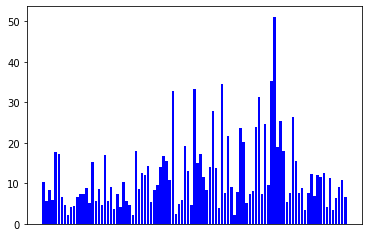

ABB SS Equity
Maximum value: 0.000000
ABB SS Equity
Minimum value: 0.000000


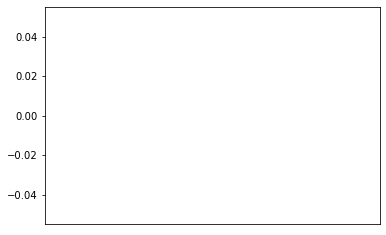

WDH DC Equity
Maximum value: 1759.000000
NOVOB DC Equity
Minimum value: 178.000000


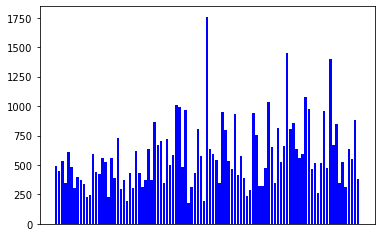

TDC DC Equity
Maximum value: 203.333929
NOVOB DC Equity
Minimum value: 11.224685


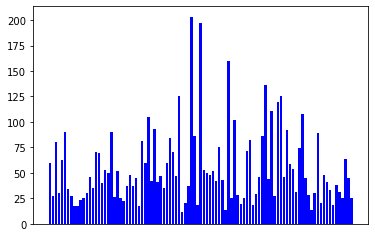

WDH DC Equity
Maximum value: 111.000000
KNEBV FH Equity
Minimum value: 2.000000


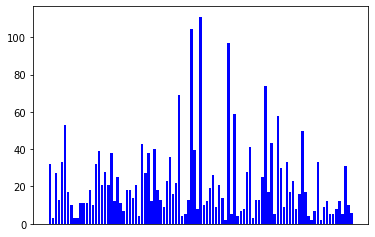

TDC DC Equity
Maximum value: 2838.000000
NOVOB DC Equity
Minimum value: 297.000000


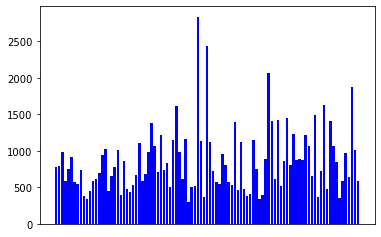

MAERSKA DC Equity
Maximum value: 6.333957
GJF NO Equity
Minimum value: -0.640448


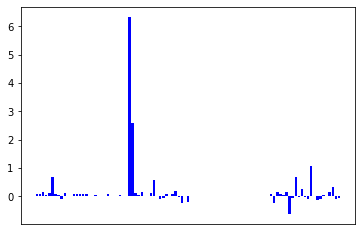

MAERSKA DC Equity
Maximum value: 10.000000
NOK1V FH Equity
Minimum value: 0.005000


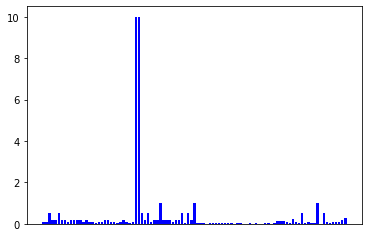

MAERSKA DC Equity
Maximum value: 99.991191
SAND SS Equity
Minimum value: 0.000000


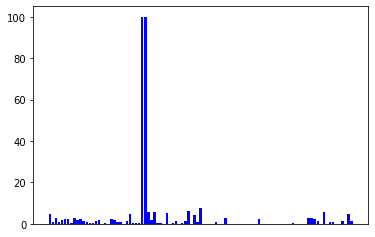

TLS1V FH Equity
Maximum value: 55.152241
MAERSKA DC Equity
Minimum value: 0.892965


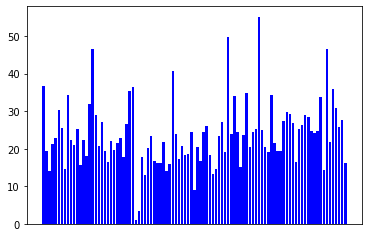

In [14]:
dict_analysis(mean_times_trades)
dict_analysis(median_time_trades)
dict_analysis(long_time_trades)
dict_analysis(mean_times_ticks)
dict_analysis(median_time_ticks)
dict_analysis(long_time_ticks)
dict_analysis(mean_bid_ask)
dict_analysis(median_bid_ask)
dict_analysis(round_number_price)
dict_analysis(round_number_volume)